# Random Forest

Let's revisit the previous datasets we used to help explain Random forest as both a classifier and a regressor.

First let's get the data that was previously saved (via Google Drive or Jupyter)

## Preprocessing Data

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc


C:\Users\casensi4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\casensi4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('Dataset_churn_oct18_cbu_v2.txt', delimiter='|', encoding='latin1')

In [3]:
data.dtypes

ID                        int64
STACK                    object
Months_of_tenure        float64
CODIGO_POSTAL            object
descuento                 int64
meses_fin_dto             int64
sum_ind_under_use         int64
sum_ind_over_use          int64
blindaje_bi               int64
blinda_bi_n2              int64
blinda_bi_n4              int64
blindaje_bi_expirado      int64
voz                       int64
fibra                     int64
adsl                      int64
hz                        int64
lpd                       int64
tv                        int64
deuda                     int64
ARPC                    float64
FTTH_COVERAGE             int64
HFC_COVERAGE              int64
NEBA_COVERAGE             int64
CUSTOMER_EXPERIENCE       int64
FACTURACION               int64
PRODUCTOS                 int64
TERMINALES                int64
COMPETENCIA               int64
VIRAL                     int64
DESVINCULACION            int64
USO                       int64
VERDAD  

In [4]:
mean = data.Months_of_tenure.mean()        

In [5]:
mean

81.67288194857557

In [6]:
data[['Months_of_tenure']] = data[['Months_of_tenure']].fillna(data['Months_of_tenure'].mean()) 

In [7]:
data.blindaje_bi.unique()

array([1, 0], dtype=int64)

In [8]:
encoder = LabelEncoder()
data['STACK'] = encoder.fit_transform(data.STACK.values)

In [9]:
data_cp = data.copy()
data_cp = data_cp.drop(['ID'], axis=1)
data_cp = data_cp.drop(['CODIGO_POSTAL'], axis=1)
data_cp = data_cp.drop(['DESVINCULACION'], axis=1)
data_cp.head()

,STACK,Months_of_tenure,descuento,meses_fin_dto,sum_ind_under_use,sum_ind_over_use,blindaje_bi,blinda_bi_n2,blinda_bi_n4,blindaje_bi_expirado,...,CUSTOMER_EXPERIENCE,FACTURACION,PRODUCTOS,TERMINALES,COMPETENCIA,VIRAL,USO,VERDAD,TOTAL_POINTS,CHURN
0,0,3.0,0,-1,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,37.0,0,-1,0,1,0,0,0,0,...,0,3,0,0,0,0,0,0,3,0
2,0,147.0,0,-1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33.0,1,16,2,0,1,0,0,0,...,0,0,0,0,3,0,0,0,3,0
4,0,10.0,1,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


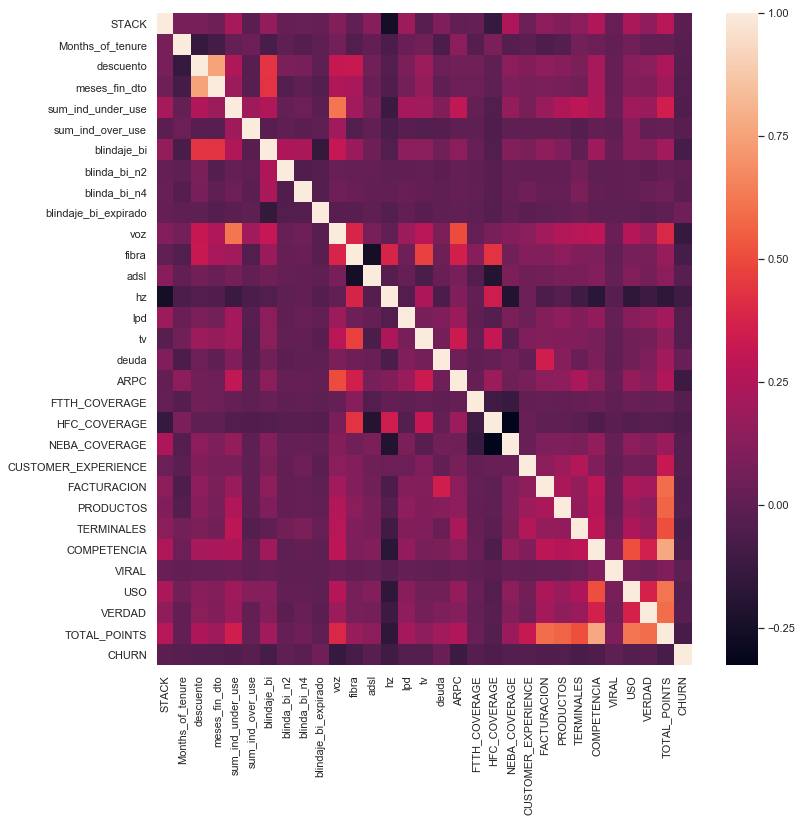

In [10]:
corr = data_cp.corr()

sns.set(rc={'figure.figsize':(12,12)})

sns.heatmap(data=corr, annot=False)
plt.show()

In [11]:
corr

,STACK,Months_of_tenure,descuento,meses_fin_dto,sum_ind_under_use,sum_ind_over_use,blindaje_bi,blinda_bi_n2,blinda_bi_n4,blindaje_bi_expirado,...,CUSTOMER_EXPERIENCE,FACTURACION,PRODUCTOS,TERMINALES,COMPETENCIA,VIRAL,USO,VERDAD,TOTAL_POINTS,CHURN
STACK,1.000000,0.073518,0.073881,0.042663,0.219721,-0.005979,0.164296,0.021633,0.026402,0.021612,...,0.039957,0.144468,0.106195,0.138444,0.249698,0.034013,0.231063,0.152251,0.271234,-0.005841
Months_of_tenure,0.073518,1.000000,-0.137442,-0.088481,0.016671,0.039005,-0.067970,-0.002901,-0.027974,0.002143,...,-0.015345,-0.056949,-0.032242,0.061989,0.036986,0.010875,0.052470,0.013967,0.011701,-0.019000
descuento,0.073881,-0.137442,1.000000,0.755246,0.245934,-0.021962,0.438797,0.089154,0.079489,-0.002686,...,0.108335,0.145518,0.121223,0.088118,0.221408,0.021096,0.128455,0.132452,0.241761,-0.034004
meses_fin_dto,0.042663,-0.088481,0.755246,1.000000,0.190403,-0.022756,0.433165,-0.032932,0.000777,-0.034602,...,0.078120,0.092064,0.074446,0.060484,0.227492,0.023400,0.111777,0.108105,0.198449,-0.046832
sum_ind_under_use,0.219721,0.016671,0.245934,0.190403,1.000000,0.194233,0.250205,0.016350,0.038298,-0.011540,...,0.078384,0.175929,0.250703,0.291995,0.238583,0.028206,0.195422,0.182078,0.353040,-0.049345
sum_ind_over_use,-0.005979,0.039005,-0.021962,-0.022756,0.194233,1.000000,-0.025950,0.002392,-0.005723,-0.004590,...,0.000343,0.004270,0.002640,-0.034008,0.010781,0.001052,0.122384,0.012130,0.021705,-0.020335
blindaje_bi,0.164296,-0.067970,0.438797,0.433165,0.250205,-0.025950,1.000000,0.240146,0.228170,-0.142726,...,0.089880,0.147229,0.100632,0.003173,0.197089,0.020716,0.121878,0.113999,0.202566,-0.082259
blinda_bi_n2,0.021633,-0.002901,0.089154,-0.032932,0.016350,0.002392,0.240146,1.000000,-0.047918,-0.037064,...,0.012324,0.014266,0.011385,0.054355,-0.002371,0.000569,0.005672,-0.008478,0.017222,0.004247
blinda_bi_n4,0.026402,-0.027974,0.079489,0.000777,0.038298,-0.005723,0.228170,-0.047918,1.000000,-0.035609,...,0.043363,0.023614,0.024635,0.090947,0.010606,0.000662,0.007798,0.026739,0.048533,-0.011861
blindaje_bi_expirado,0.021612,0.002143,-0.002686,-0.034602,-0.011540,-0.004590,-0.142726,-0.037064,-0.035609,1.000000,...,-0.006841,-0.004373,0.008260,0.026502,-0.003999,-0.000887,-0.004659,-0.013737,-0.000154,0.051111


In [12]:
y = data_cp['CHURN']
X = data_cp.drop(['CHURN'], axis=1)

In [13]:
x_train, x_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.33, random_state=123)

## Random Forest

rf = RandomForestClassifier(n_estimators=20, random_state=123)

param_grid = {
        'max_depth' : [4,5,6,7],
        'min_samples_leaf' : [30,40,50],
        'max_features' : [0.20, 0.30, 0.40, 0.50] ,
        'class_weight' : [{0:0.20, 1:0.80}, {0:0.05, 1:0.95}]
            }

gs = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')
gs.fit(x_train, y_train)
gs2 = gs.best_estimator_

gs.best_estimator_


gs2.fit(x_train, y_train)

In [14]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight={0: 0.2, 1: 0.8},
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_jobs=None, oob_score=False,
            random_state=123, verbose=0, warm_start=False)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
pred = rf.predict(x_test)

In [ ]:

metrics.accuracy_score(y_test, pred)

In [ ]:
pred_prob = rf.predict_proba(x_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, pred_prob[:, 1]) 
roc_auc = auc(fpr, tpr)
roc_auc 


In [ ]:
# Plot ROC curve with AUC score

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='b', lw=lw, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show() 

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

feature = x_train 
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



In [ ]:

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [ ]:
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

We can see that although it does not have as high a precision as logistic regression (although comparable), it was able to get better results of recall. This would mean that for the churn model, we would have a higher chance of catching all customers that have a high probability of churn.

In [ ]:
kappa_scorer = make_scorer(cohen_kappa_score)

#### Imputing

In [ ]:
cols = ['voz', 'fibra', 'adsl', 'hz', 'lpd', 'tv']
weights = [10, 5, 2, 1, 1, 2]

In [ ]:
data_cp['products'] = data_cp[cols].mul(weights).sum(1)